# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

# Main blocks of code:
* Aggregate variables to measure offer success
* Save file for prediction
* Data analysis

#### Question to be answered:
* Which age groups complete the offer?

### Importing libraries, cleaned dataset, aggregate variables

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MultiLabelBinarizer

In [47]:
# read merged data
df = pd.read_csv(r'C:\Users\BernadettKepenyes\Documents\GitHub\starbucks-offer-success\clean_df.csv')
df.head(20)

,profile_gender,profile_age,member_id,profile_income,profile_membership_days,transcript_time,offer_completed,offer_received,offer_viewed,offer_transaction,transcript_amount,transcript_reward,offer_id,meta_reward,meta_required_spending,meta_max_hours
0,2,55.0,0610b486422d4921ae7d2bf64640c50b,112000.0,1363,18,0,0,0,1,21.51,0.0,0.0,0.0,0.0,0.0
1,2,55.0,0610b486422d4921ae7d2bf64640c50b,112000.0,1363,144,0,0,0,1,32.28,0.0,0.0,0.0,0.0,0.0
2,2,55.0,0610b486422d4921ae7d2bf64640c50b,112000.0,1363,408,0,1,0,0,0.00,0.0,6.0,5.0,5.0,168.0
3,2,55.0,0610b486422d4921ae7d2bf64640c50b,112000.0,1363,504,0,1,0,0,0.00,0.0,10.0,0.0,0.0,96.0
4,2,55.0,0610b486422d4921ae7d2bf64640c50b,112000.0,1363,528,0,0,0,1,23.22,0.0,0.0,0.0,0.0,0.0
5,2,55.0,0610b486422d4921ae7d2bf64640c50b,112000.0,1363,528,1,0,0,0,0.00,5.0,6.0,5.0,5.0,168.0
6,2,75.0,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1430,0,0,1,0,0,0.00,0.0,6.0,5.0,5.0,168.0
7,2,75.0,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1430,6,0,0,1,0,0.00,0.0,6.0,5.0,5.0,168.0
8,2,75.0,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1430,132,0,0,0,1,19.89,0.0,0.0,0.0,0.0,0.0
9,2,75.0,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1430,132,1,0,0,0,0.00,5.0,6.0,5.0,5.0,168.0


In [48]:
df['member_id'].nunique()

14825

In [49]:
df.columns

Index(['profile_gender', 'profile_age', 'member_id', 'profile_income',
       'profile_membership_days', 'transcript_time', 'offer_completed',
       'offer_received', 'offer_viewed', 'offer_transaction',
       'transcript_amount', 'transcript_reward', 'offer_id', 'meta_reward',
       'meta_required_spending', 'meta_max_hours'],
      dtype='object')

In [50]:
# groupby by member_id 
df = df.groupby('member_id').agg(
    {
        'profile_gender': np.mean, 
        'profile_age': np.mean,
        'profile_income': np.mean,
        'profile_membership_days': np.mean,
        'transcript_time': np.mean,
        'offer_completed': sum,
        'offer_received': sum, 
        'offer_viewed': sum,
        'offer_transaction': sum,
        'transcript_amount': sum,
        'transcript_reward': sum,
        'offer_id': set,
        'meta_reward': sum,
        'meta_required_spending': sum,
        'meta_max_hours': np.mean        
    }
)

df.head()

,profile_gender,profile_age,profile_income,profile_membership_days,transcript_time,offer_completed,offer_received,offer_viewed,offer_transaction,transcript_amount,transcript_reward,offer_id,meta_reward,meta_required_spending,meta_max_hours
member_id,,,,,,,,,,,,,,,
0009655768c64bdeb2e877511632db8f,1,33.0,72000.0,1448,470.700000,3,5,4,8,127.60,9.0,"{0.0, 1.0, 3.0, 7.0, 8.0, 10.0}",25.0,65.0,87.600000
0011e0d4e6b944f998e987f904e8c1e5,0,40.0,57000.0,1185,365.000000,3,5,5,5,79.46,13.0,"{0.0, 2.0, 6.0, 8.0, 9.0, 10.0}",39.0,96.0,114.666667
0020c2b971eb4e9188eac86d93036a77,2,59.0,90000.0,1861,335.684211,3,5,3,8,196.86,14.0,"{0.0, 1.0, 4.0, 5.0, 8.0}",50.0,90.0,98.526316
0020ccbbb6d84e358d3414a3ff76cffd,2,24.0,60000.0,1609,374.869565,3,4,4,12,154.05,13.0,"{0.0, 2.0, 3.0, 6.0, 8.0}",39.0,51.0,65.739130
003d66b6608740288d6cc97a6903f4f0,2,26.0,73000.0,1387,390.600000,3,5,4,18,48.34,9.0,"{0.0, 1.0, 8.0, 9.0, 10.0}",22.0,100.0,75.200000


In [51]:
# add a new column - successful offer
df['successful_offer'] = df[['offer_viewed','offer_completed']].min(axis=1)
df.head(2)

,profile_gender,profile_age,profile_income,profile_membership_days,transcript_time,offer_completed,offer_received,offer_viewed,offer_transaction,transcript_amount,transcript_reward,offer_id,meta_reward,meta_required_spending,meta_max_hours,successful_offer
member_id,,,,,,,,,,,,,,,,
0009655768c64bdeb2e877511632db8f,1,33.0,72000.0,1448,470.7,3,5,4,8,127.60,9.0,"{0.0, 1.0, 3.0, 7.0, 8.0, 10.0}",25.0,65.0,87.600000,3
0011e0d4e6b944f998e987f904e8c1e5,0,40.0,57000.0,1185,365.0,3,5,5,5,79.46,13.0,"{0.0, 2.0, 6.0, 8.0, 9.0, 10.0}",39.0,96.0,114.666667,3


In [52]:
df.groupby('successful_offer').describe()

profile_gender                                               \
                          count      mean       std  min  25%  50%  75%  max   
successful_offer                                                               
0                        2909.0  1.257821  0.462721  0.0  1.0  1.0  2.0  2.0   
1                        2856.0  1.341737  0.502347  0.0  1.0  1.0  2.0  2.0   
2                        3477.0  1.458441  0.522576  0.0  1.0  1.0  2.0  2.0   
3                        3078.0  1.461988  0.529608  0.0  1.0  1.0  2.0  2.0   
4                        1891.0  1.461660  0.533517  0.0  1.0  1.0  2.0  2.0   
5                         555.0  1.500901  0.538667  0.0  1.0  2.0  2.0  2.0   
6                          59.0  1.406780  0.590693  0.0  1.0  1.0  2.0  2.0   

                 profile_age             ... meta_required_spending         \
                       count       mean  ...                    75%    max   
successful_offer                         ...                                 
0                     2909.0  50.990718  ...                   68.0  150.0   
1                     2856.0  53.194678  ...                   71.0  170.0   
2                     3477.0  55.341099  ...                   90.0  191.0   
3                     3078.0  56.113385  ...                  110.0  220.0   
4                     1891.0  56.144368  ...                  135.0  211.0   
5                      555.0  56.866667  ...                  156.0  240.0   
6                       59.0  55.254237  ...                  180.0  255.0   

                 meta_max_hours                                               \
                          count        mean        std        min        25%   
successful_offer                                                               
0                        2909.0   95.076271  36.574599   0.000000  69.818182   
1                        2856.0   86.264265  29.256375  22.500000  63.118421   
2                        3477.0   88.745293  26.794524  31.304348  67.764706   
3                        3078.0   90.817979  22.949463  40.200000  73.846154   
4                        1891.0   94.468732  20.376918  46.800000  79.474138   
5                         555.0   98.416079  19.305194  52.000000  84.974026   
6                          59.0  102.072496  18.440087  55.500000  92.509091   

                                                      
                         50%         75%         max  
successful_offer                                      
0                  90.666667  116.000000  240.000000  
1                  84.000000  105.000000  201.600000  
2                  85.500000  105.600000  202.000000  
3                  88.421053  105.547826  172.500000  
4                  92.869565  107.760000  176.470588  
5                  96.923077  110.200000  172.571429  
6                 101.250000  112.114286  155.520000  

[7 rows x 112 columns]

In [53]:
pf_avg_amount = df['transcript_amount'].mean()
df['transaction_amount_rate'] = df['transcript_amount'] / pf_avg_amount

df.head()

,profile_gender,profile_age,profile_income,profile_membership_days,transcript_time,offer_completed,offer_received,offer_viewed,offer_transaction,transcript_amount,transcript_reward,offer_id,meta_reward,meta_required_spending,meta_max_hours,successful_offer,transaction_amount_rate
member_id,,,,,,,,,,,,,,,,,
0009655768c64bdeb2e877511632db8f,1,33.0,72000.0,1448,470.700000,3,5,4,8,127.60,9.0,"{0.0, 1.0, 3.0, 7.0, 8.0, 10.0}",25.0,65.0,87.600000,3,1.090336
0011e0d4e6b944f998e987f904e8c1e5,0,40.0,57000.0,1185,365.000000,3,5,5,5,79.46,13.0,"{0.0, 2.0, 6.0, 8.0, 9.0, 10.0}",39.0,96.0,114.666667,3,0.678982
0020c2b971eb4e9188eac86d93036a77,2,59.0,90000.0,1861,335.684211,3,5,3,8,196.86,14.0,"{0.0, 1.0, 4.0, 5.0, 8.0}",50.0,90.0,98.526316,3,1.682159
0020ccbbb6d84e358d3414a3ff76cffd,2,24.0,60000.0,1609,374.869565,3,4,4,12,154.05,13.0,"{0.0, 2.0, 3.0, 6.0, 8.0}",39.0,51.0,65.739130,3,1.316350
003d66b6608740288d6cc97a6903f4f0,2,26.0,73000.0,1387,390.600000,3,5,4,18,48.34,9.0,"{0.0, 1.0, 8.0, 9.0, 10.0}",22.0,100.0,75.200000,3,0.413063


In [54]:
# creating user categories
conditions = [ 
    (df['transaction_amount_rate'] >= 1) & (df['successful_offer'] < 3), 
    (df['transaction_amount_rate'] < 1) & (df['successful_offer'] <= 3), 
    (df['transaction_amount_rate'] >= 1) & (df['successful_offer'] >= 3), 
    (df['transaction_amount_rate'] < 1) & (df['successful_offer'] > 3) ]
choices = [0, 1, 2, 3]

df['user_category'] = np.select(conditions, choices)

df.head()

,profile_gender,profile_age,profile_income,profile_membership_days,transcript_time,offer_completed,offer_received,offer_viewed,offer_transaction,transcript_amount,transcript_reward,offer_id,meta_reward,meta_required_spending,meta_max_hours,successful_offer,transaction_amount_rate,user_category
member_id,,,,,,,,,,,,,,,,,,
0009655768c64bdeb2e877511632db8f,1,33.0,72000.0,1448,470.700000,3,5,4,8,127.60,9.0,"{0.0, 1.0, 3.0, 7.0, 8.0, 10.0}",25.0,65.0,87.600000,3,1.090336,2
0011e0d4e6b944f998e987f904e8c1e5,0,40.0,57000.0,1185,365.000000,3,5,5,5,79.46,13.0,"{0.0, 2.0, 6.0, 8.0, 9.0, 10.0}",39.0,96.0,114.666667,3,0.678982,1
0020c2b971eb4e9188eac86d93036a77,2,59.0,90000.0,1861,335.684211,3,5,3,8,196.86,14.0,"{0.0, 1.0, 4.0, 5.0, 8.0}",50.0,90.0,98.526316,3,1.682159,2
0020ccbbb6d84e358d3414a3ff76cffd,2,24.0,60000.0,1609,374.869565,3,4,4,12,154.05,13.0,"{0.0, 2.0, 3.0, 6.0, 8.0}",39.0,51.0,65.739130,3,1.316350,2
003d66b6608740288d6cc97a6903f4f0,2,26.0,73000.0,1387,390.600000,3,5,4,18,48.34,9.0,"{0.0, 1.0, 8.0, 9.0, 10.0}",22.0,100.0,75.200000,3,0.413063,1


In [55]:
df.groupby('user_category').describe()

profile_gender                                               \
                       count      mean       std  min  25%  50%  75%  max   
user_category                                                               
0                     1815.0  1.533333  0.519590  0.0  1.0  2.0  2.0  2.0   
1                     8564.0  1.323797  0.495585  0.0  1.0  1.0  2.0  2.0   
2                     3990.0  1.499499  0.533063  0.0  1.0  2.0  2.0  2.0   
3                      456.0  1.401316  0.537718  0.0  1.0  1.0  2.0  2.0   

              profile_age             ... successful_offer       \
                    count       mean  ...              75%  max   
user_category                         ...                         
0                  1815.0  57.284298  ...              2.0  2.0   
1                  8564.0  52.603106  ...              2.0  3.0   
2                  3990.0  56.792231  ...              4.0  6.0   
3                   456.0  55.524123  ...              4.0  6.0   

              transaction_amount_rate                                          \
                                count      mean       std       min       25%   
user_category                                                                   
0                              1815.0  1.690642  1.116197  1.000785  1.162541   
1                              8564.0  0.391327  0.281629  0.000000  0.148682   
2                              3990.0  2.020707  1.334641  1.000101  1.312975   
3                               456.0  0.751187  0.176399  0.235413  0.635403   

                                              
                    50%       75%        max  
user_category                                 
0              1.382488  1.731036   9.957091  
1              0.330006  0.610387   0.999930  
2              1.658618  2.180650  13.746179  
3              0.780923  0.899655   0.999418  

[4 rows x 128 columns]

In [56]:
# encode channels 
mlb = MultiLabelBinarizer()
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
channel = pd.DataFrame(mlb.fit_transform(df['offer_id']), columns=classes, index=df.index)

# drop channels column with new channel columns
df = df.drop(['offer_id'], axis=1)

# concatenate the original 'po' df with new channel df
df = pd.concat([df,channel], join='inner', axis=1)
df.head()

,profile_gender,profile_age,profile_income,profile_membership_days,transcript_time,offer_completed,offer_received,offer_viewed,offer_transaction,transcript_amount,...,1,2,3,4,5,6,7,8,9,10
member_id,,,,,,,,,,,,,,,,,,,,,
0009655768c64bdeb2e877511632db8f,1,33.0,72000.0,1448,470.700000,3,5,4,8,127.60,...,1,0,1,0,0,0,1,1,0,1
0011e0d4e6b944f998e987f904e8c1e5,0,40.0,57000.0,1185,365.000000,3,5,5,5,79.46,...,0,1,0,0,0,1,0,1,1,1
0020c2b971eb4e9188eac86d93036a77,2,59.0,90000.0,1861,335.684211,3,5,3,8,196.86,...,1,0,0,1,1,0,0,1,0,0
0020ccbbb6d84e358d3414a3ff76cffd,2,24.0,60000.0,1609,374.869565,3,4,4,12,154.05,...,0,1,1,0,0,1,0,1,0,0
003d66b6608740288d6cc97a6903f4f0,2,26.0,73000.0,1387,390.600000,3,5,4,18,48.34,...,1,0,0,0,0,0,0,1,1,1


In [57]:
df.groupby('user_category').agg({'0':sum,'1':sum,'2':sum,'3':sum,'4':sum,'5':sum,'6':sum,'7':sum,'8':sum,'9':sum,'10':sum})

,0,1,2,3,4,5,6,7,8,9,10
user_category,,,,,,,,,,,
0,1815,522,483,485,502,527,588,556,814,642,855
1,8231,2929,2972,2996,3125,3053,3163,3159,3243,3238,3307
2,3990,1842,1820,1743,1696,1773,1579,1573,1344,1524,1254
3,456,251,232,221,188,211,212,192,116,184,108


In [58]:
df.isnull().sum()

profile_gender             0
profile_age                0
profile_income             0
profile_membership_days    0
transcript_time            0
offer_completed            0
offer_received             0
offer_viewed               0
offer_transaction          0
transcript_amount          0
transcript_reward          0
meta_reward                0
meta_required_spending     0
meta_max_hours             0
successful_offer           0
transaction_amount_rate    0
user_category              0
0                          0
1                          0
2                          0
3                          0
4                          0
5                          0
6                          0
7                          0
8                          0
9                          0
10                         0
dtype: int64

In [59]:
# save data for prediction
df.to_csv(r'C:\Users\BernadettKepenyes\Documents\GitHub\starbucks-offer-success\success_df.csv', index=False)

### Data analysis

#### Question to be answered:
Which age groups complete the offer?

In [15]:
# extract columns from the database to analyze
offer_r = df.groupby('profile_age').offer_received.sum()
offer_c = df.groupby('profile_age').offer_completed.sum()
offer_s = df.groupby('profile_age').successful_offer.sum()
offer_a = df.groupby('profile_age').profile_age.mean()

result = pd.concat([offer_r, offer_c, offer_s, offer_a], axis=1)

# create age groups
bins = [10,20,30,40,50,60,70,80,90,100]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
result['profile_age_group'] = pd.cut(result['profile_age'], bins=bins, labels=labels, right=False)

result['offer_completion%'] = result.successful_offer / result.offer_received * 100


result.head()

,offer_received,offer_completed,successful_offer,profile_age,profile_age_group,offer_completion%
profile_age,,,,,,
18.0,324,129,111,18.0,10-19,34.259259
19.0,597,191,181,19.0,10-19,30.318258
20.0,587,216,202,20.0,20-29,34.412266
21.0,617,241,218,21.0,20-29,35.332253
22.0,589,211,193,22.0,20-29,32.767402


<AxesSubplot:title={'center':'Offer completion rate by age'}, xlabel='profile_age_group', ylabel='offer_completion%'>

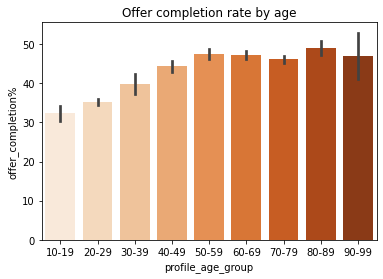

In [16]:
# plot completaion rate
plt.title('Offer completion rate by age')
sns.barplot(data = result, x='profile_age_group', y='offer_completion%', palette='Oranges')

<ipython-input-17-3e8938ef32cf>:4: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  result_melted = result_b.melt("profile_age_group", var_name="successful_offer", value_name="offer_received")


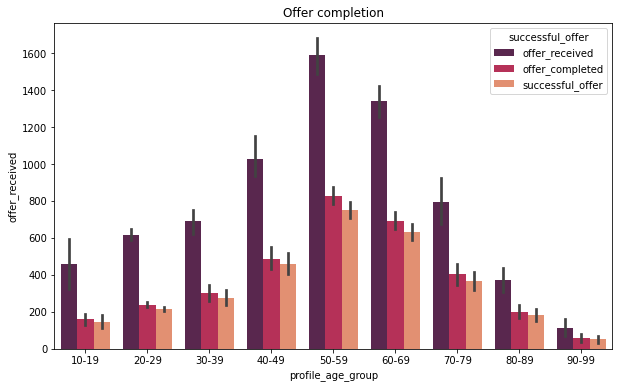

In [17]:
# plot comparison of offer and completion

result_b = result.drop(['profile_age', 'offer_completion%' ], axis=1)
result_melted = result_b.melt("profile_age_group", var_name="successful_offer", value_name="offer_received")

fig, ax1 = plt.subplots(figsize=(10,6))
palette = 'rocket'

# bar plot
ax1.set_title('Offer completion')
ax1.set_xlabel('Age group')
ax1.set_ylabel('Event')
ax1 = sns.barplot(data = result_melted, x='profile_age_group', y='offer_received', hue="successful_offer", palette=palette)
ax1.tick_params(axis='y')

plt.show()